In [1]:
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

data_dir = 'faces/Train'

data = pd.read_csv('faces/train.csv')

#lists to hold image data and labels
images = []
labels = []

# Loop through the dataframe
for index, row in data.iterrows():
    image_path = os.path.join(data_dir, row['ID'])
    try:
        # Open the image file
        img = Image.open(image_path)
        img = img.resize((128, 128))  
        images.append(img)
        labels.append(row['Class'])
    except IOError:
        print(f"Error: Cannot open {image_path}")

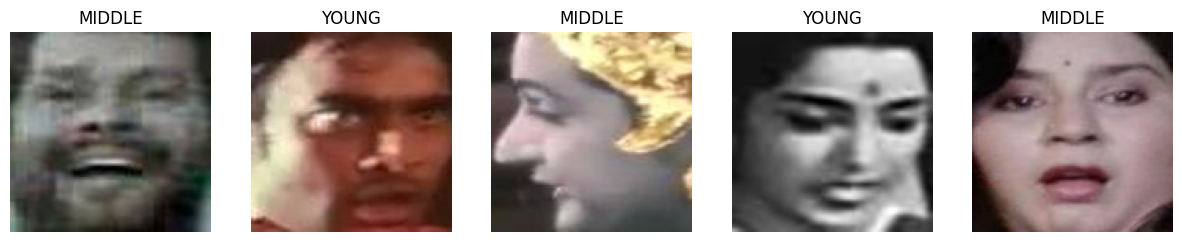

In [2]:
# Function to display a sample of images with labels
def display_sample_images(images, labels, sample_size=5):
    if len(images) < sample_size:
        print("Not enough images to display")
        return
    fig, axes = plt.subplots(1, sample_size, figsize=(15, 3))
    for i in range(sample_size):
        ax = axes[i]
        ax.imshow(images[i])
        ax.set_title(labels[i])
        ax.axis('off')
    plt.show()

# Call the function to display images
display_sample_images(images, labels, sample_size=5)

In [3]:
# %%
print(f"Total number of images loaded: {len(images)}")


# %%
from collections import Counter

label_counts = Counter(labels)

# Print the count of each category
print(f"Counts by category: {label_counts}")

Total number of images loaded: 19906
Counts by category: Counter({'MIDDLE': 10804, 'YOUNG': 6706, 'OLD': 2396})


In [4]:
# Path to the directory where  images are stored
data_dir = 'faces/Train'

# Load the CSV file
data = pd.read_csv('faces/train.csv')

# Number of samples per class
samples_per_class = 100

# Prepare lists to hold image data and labels
images = []
labels = []

# Separate data by class
data_young = data[data['Class'] == 'YOUNG']
data_middle = data[data['Class'] == 'MIDDLE']
data_old = data[data['Class'] == 'OLD']

# Function to load images from each category
def load_images(data, samples_per_class):
    sampled_data = data.sample(n=samples_per_class, random_state=42)  # Ensure reproducibility
    local_images = []
    local_labels = []
    for _, row in sampled_data.iterrows():
        image_path = os.path.join(data_dir, row['ID'])
        try:
            img = Image.open(image_path)
            img = img.resize((128, 128))  # Resize images if needed
            local_images.append(img)
            local_labels.append(row['Class'])
        except IOError:
            print(f"Error: Cannot open {image_path}")
    return local_images, local_labels

# Load images from each category
young_images, young_labels = load_images(data_young, samples_per_class)
middle_images, middle_labels = load_images(data_middle, samples_per_class)
old_images, old_labels = load_images(data_old, samples_per_class)

# Combine the lists
images.extend(young_images + middle_images + old_images)
labels.extend(young_labels + middle_labels + old_labels)

print(f"Total number of images loaded: {len(images)}")
print(f"Distribution of labels: {pd.Series(labels).value_counts()}")

Total number of images loaded: 300
Distribution of labels: YOUNG     100
MIDDLE    100
OLD       100
dtype: int64


In [5]:
# Encode labels to integers
label_encoder = LabelEncoder()
labels_int = label_encoder.fit_transform(labels)  

# Convert integer labels to one-hot
labels_one_hot = to_categorical(labels_int)

In [6]:
X_train = np.array([np.array(image) for image in images]) / 255.0
y_train = np.array(labels_one_hot)  # 'labels_one_hot' from  previous encoding step

In [7]:
# Building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Program Files\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 0.0050
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 984ms/step - accuracy: 1.0000 - loss: 3.2713e-05
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 975ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 995ms/step - accuracy: 0.9974 - loss: 0.0112
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 975ms/step - accuracy: 0.9966 - loss: 0.0068
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 963ms/step - accuracy: 0.9973 - loss: 0.0114
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 908ms/step - accuracy: 0.9942 - loss: 0.0568
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 884ms/step - accuracy: 0.9991 - loss: 0.0110
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 995ms/step - accuracy: 0.9947 - loss: 0.0097
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9956 - loss: 0.0148
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 925ms/step - accuracy: 0.9973 - loss: 0.0033
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s

In [18]:
# %%
data_dir = 'faces/Train'

# List all image files in the directory
all_files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]

# Print the total number of files found
print("Total files found:", len(all_files))


# %%
selected_files = random.sample(all_files, 50)  # Randomly select 50 images

# Preprocess images
images = []
for filename in selected_files:
    image_path = os.path.join(data_dir, filename)
    img = Image.open(image_path)
    img = img.resize((128, 128))  # Resize to the dimensions used during training
    img = np.array(img) / 255.0  # Normalize the image
    images.append(img)

# Convert list to a numpy array
X_test = np.array(images)

# Check to ensure the shape is correct, expecting (50, 128, 128, 3) if images are RGB
print(X_test.shape)

Total files found: 19906
(50, 128, 128, 3)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


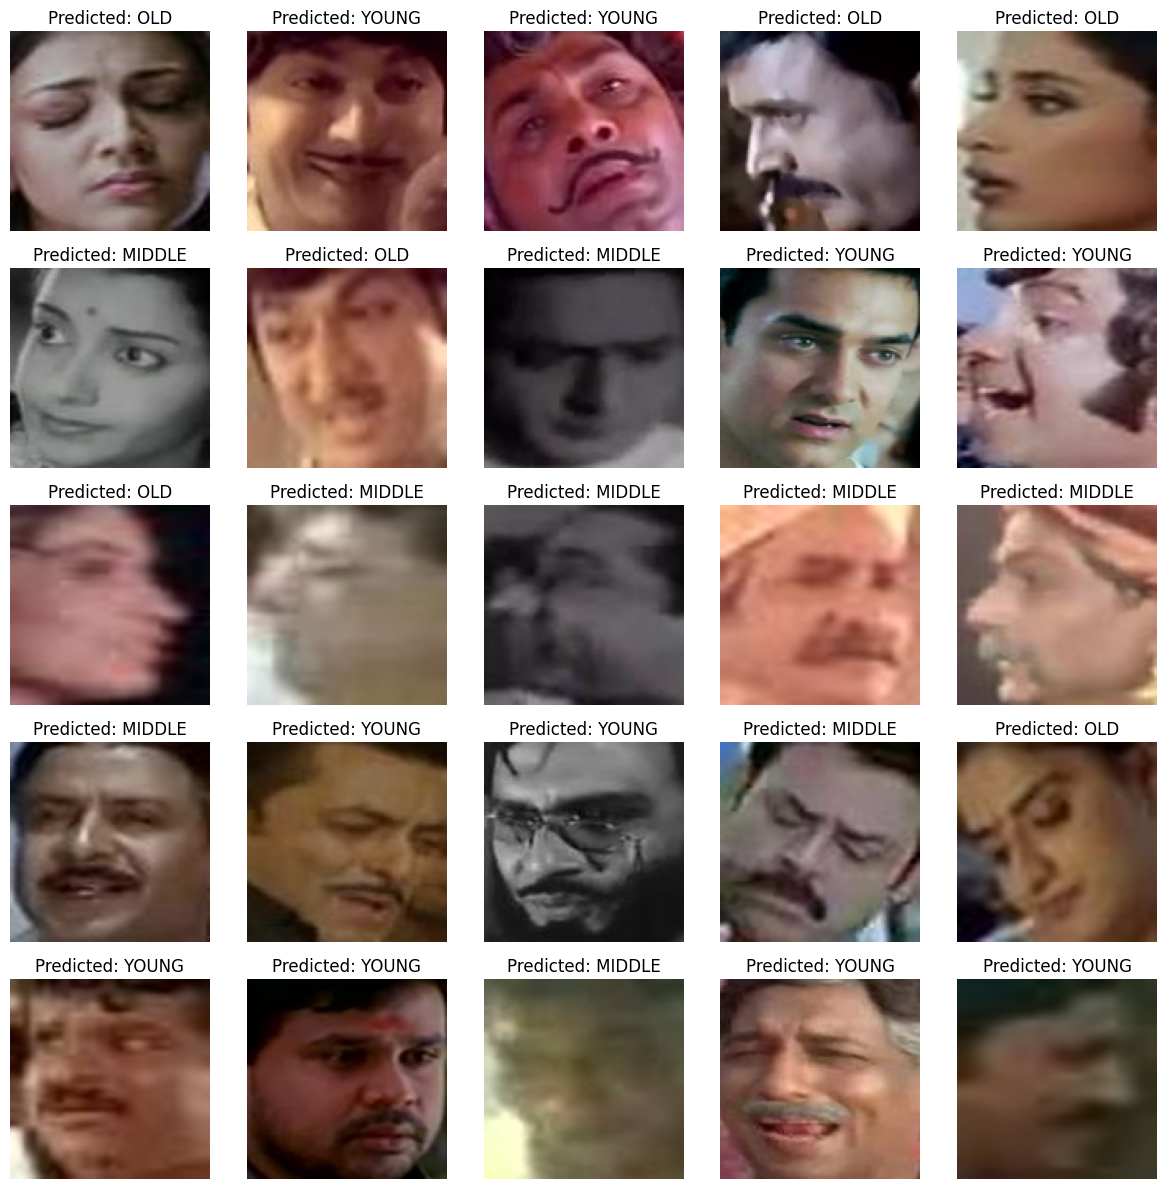

In [19]:
# %%
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

#Display the images with predicted labels
class_labels = ['YOUNG', 'MIDDLE', 'OLD']  
predicted_labels = [class_labels[i] for i in predicted_classes]

# Display some images with predictions
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.flatten()
for img, ax, pred in zip(X_test, axes, predicted_labels):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Predicted: {pred}")
plt.tight_layout()
plt.show()

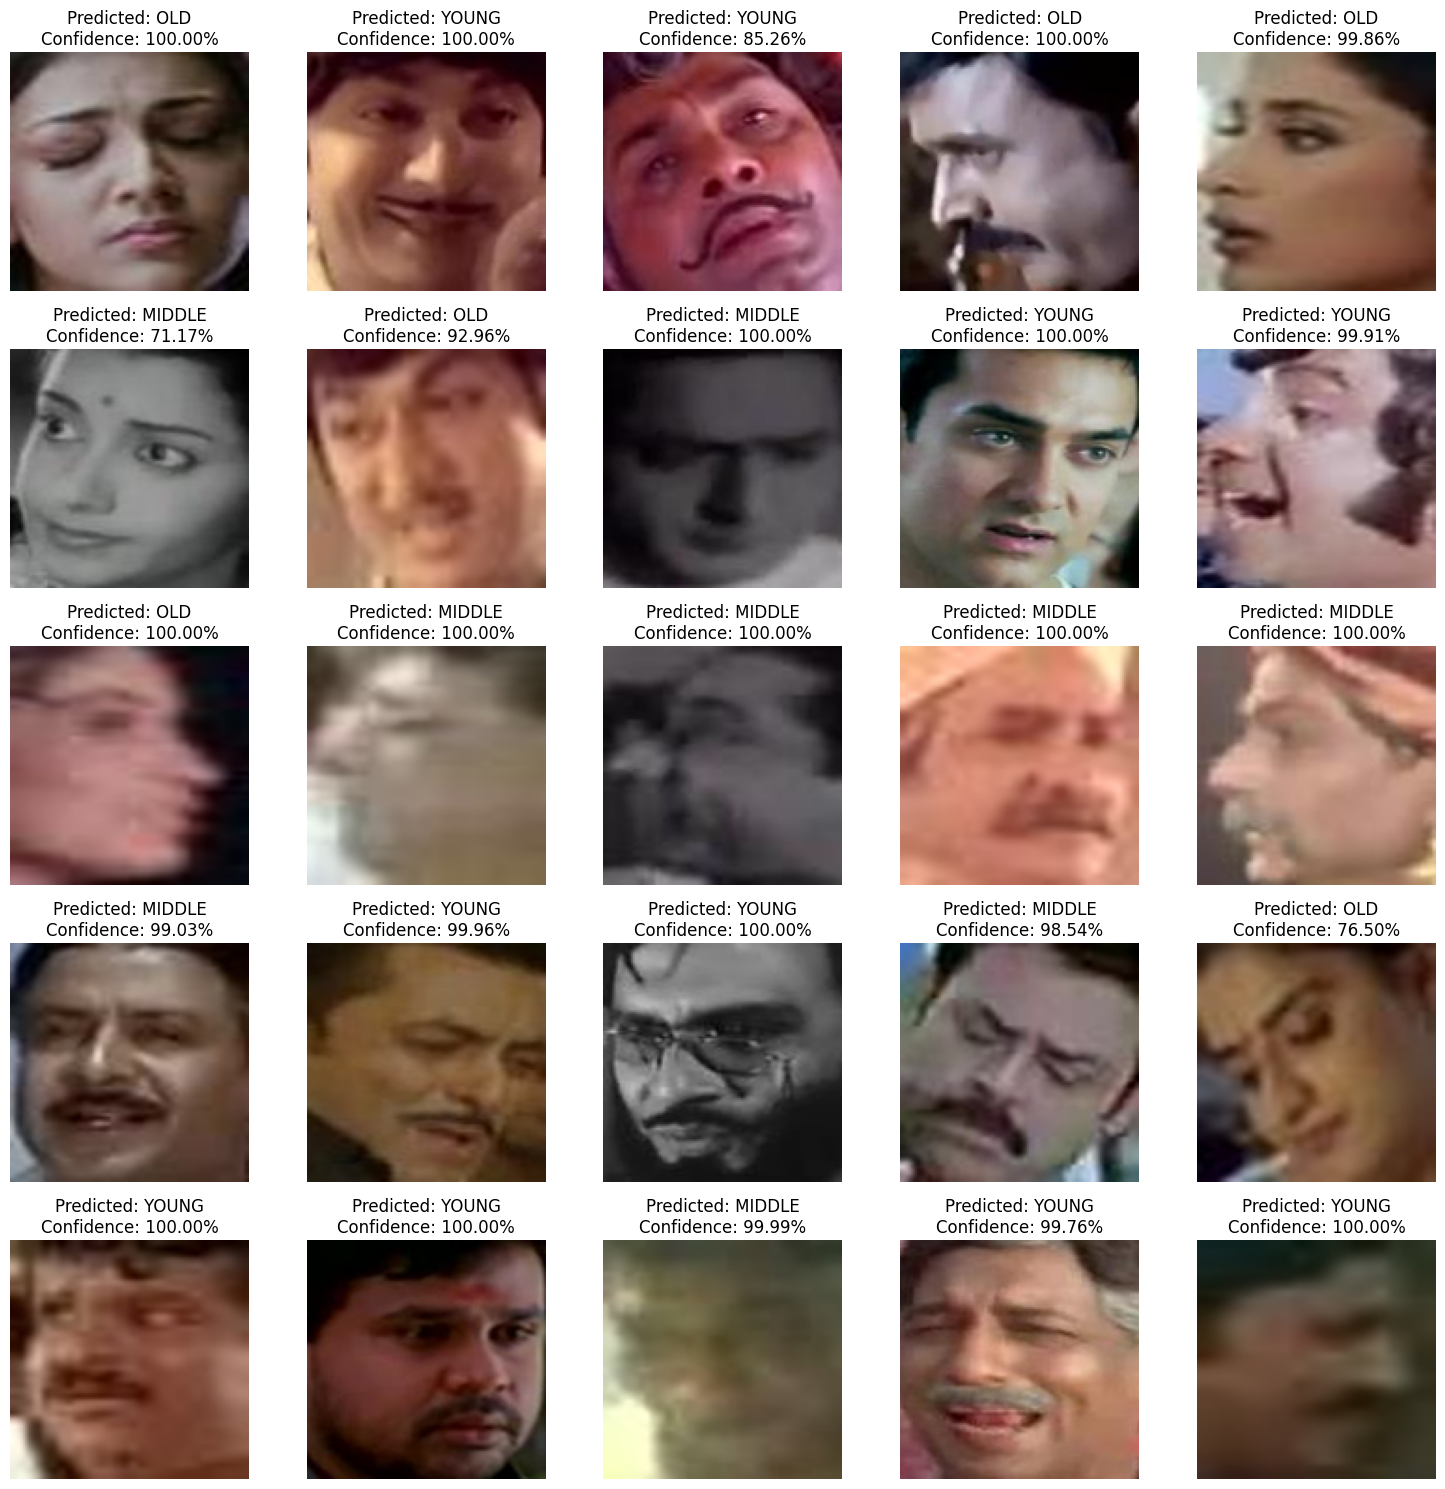

In [20]:
# %%
predicted_probabilities = np.max(predictions, axis=1)

# Display images with predicted labels and confidence
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()
for img, ax, pred, prob in zip(X_test, axes, predicted_labels, predicted_probabilities):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Predicted: {pred}\nConfidence: {prob*100:.2f}%")
plt.tight_layout()
plt.show()

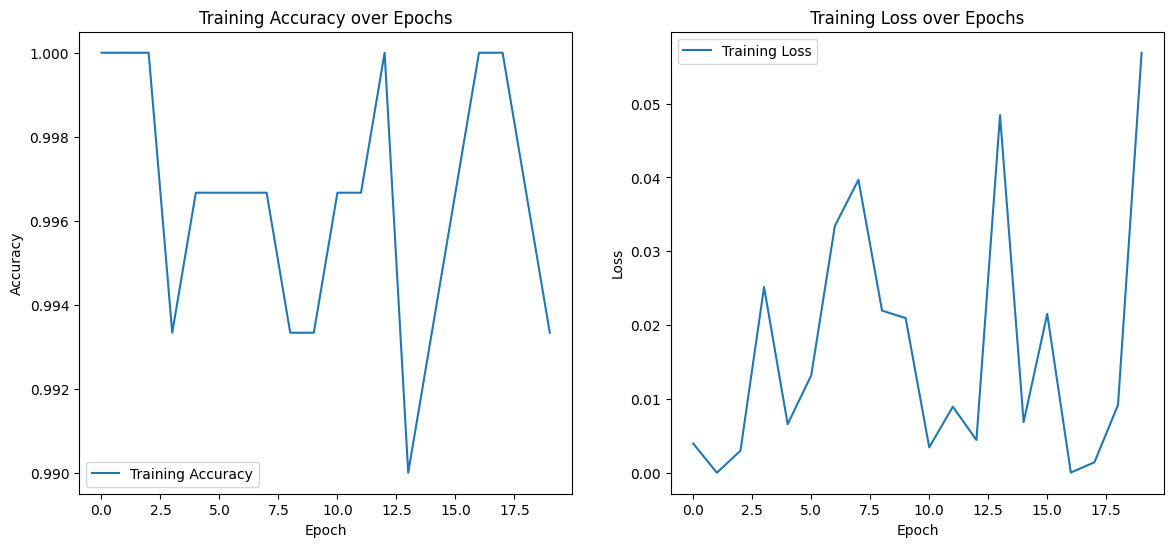

In [21]:
# Plot training accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
# Save the model to the specified directory with a filename
model_path = 'age_detection_model.h5'  # Path where you want to save the model
model.save(model_path)

In [26]:
model = load_model('age_detection_model.h5')



In [27]:
# %%
def predict_image(image_path, model):
    try:
        # Load and preprocess the image
        img = Image.open(image_path).convert('RGB')  
        img = img.resize((128, 128))  
        img = np.array(img) / 255.0   

        img = np.expand_dims(img, axis=0)

        # Make a prediction
        predictions = model.predict(img)
        predicted_class_index = np.argmax(predictions, axis=1)

        class_labels = ['YOUNG', 'MIDDLE', 'OLD']
        predicted_class = class_labels[predicted_class_index[0]]

        return predicted_class
    except Exception as e:
        return str(e)

